# Twitter dataset analysis

## Run pipelines

In [1]:
# IMPORTS
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from pipelines import Orchestrator
from analysis_helper import AnalysisHelper

INFO - datasources.tw.tw - load config file
INFO - datasources.tw.proxy_provider - getting proxy list
INFO - datasources.tw.proxy_provider - reading proxy list json file
DEBUG - datasources.tw.tw_api - INIT Tw api
DEBUG - datasources.tw.tw_premium_api - INIT Tw premium api
INFO - datasources.tw.tw - INIT Tw
DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# LOGGING LEVEL
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [3]:
# CONFIGS
project_name = 'uk_healthcare'

cd_config = ('infomap', {})

In [4]:
# PIPELINE
o = Orchestrator(project_name, cd_config)
results = o.execute()

## Analysis

### Event and graph analysis

#### Events summary

In [5]:
display(AnalysisHelper.get_single_summary('event_detection', 'event', results)
        [['start_date', 'end_date', 'location', 'hashtags']])

,start_date,end_date,location,hashtags
name,,,,
dry-january-2018,2018-01-01,2018-01-31,United Kingdom,[#dryjanuary]
cervical-cancer-prevention-week-2018,2018-01-21,2018-01-27,United Kingdom,[#cervicalcancer]
time-to-talk-day-2018,2018-02-06,2018-02-07,United Kingdom,[#timetotalk]
eating-disorder-awareness-week-2018,2018-02-25,2018-03-03,United Kingdom,"[#edaw18, #edaw2018, #eatingdisordersawareness..."
rare-disease-day-2018,2018-02-28,2018-03-01,United Kingdom,[#rarediseaseday]
ovarian-cancer-awareness-month-2018,2018-03-01,2018-03-31,United Kingdom,"[#ovariancancer, #ovariancancerawareness, #ova..."
nutrition-and-hydration-week-2018,2018-03-11,2018-03-17,United Kingdom,"[#nutritionandhydrationweek, #NHW2018]"
no-smoking-day-2018,2018-03-13,2018-03-14,United Kingdom,"[#nosmokingday, #smokefree]"
experience-of-care-week-2018,2018-04-23,2018-04-27,United Kingdom,"[#experienceofcareweek, #patientexperienceweek]"


#### Event's graphs

In [6]:
graph_summaries = AnalysisHelper.get_single_summary('network_creation', 'graph_summary', results)
graph_summaries['scc_over_nodes'] = graph_summaries.apply(lambda x: x['strongly_conn_components']/x['no_nodes'], axis=1)
display(graph_summaries.describe())
display(graph_summaries)

,assortativity,avg_clustering,avg_degree,avg_weighted_degree,density,no_edges,no_nodes,strongly_conn_components,scc_over_nodes
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,-0.208978,0.056578,2.055122,2.253250,0.004744,235.777778,236.888889,232.222222,0.978207
std,0.117639,0.042104,0.497257,0.685561,0.002379,41.650585,46.870145,47.985973,0.021499
min,-0.452900,0.000000,1.401400,1.433400,0.002400,177.000000,141.000000,130.000000,0.921986
25%,-0.280750,0.028675,1.752625,1.932100,0.003325,206.750000,210.500000,206.000000,0.971797
50%,-0.227900,0.047650,1.957700,2.047800,0.004350,232.500000,246.000000,240.000000,0.984163
75%,-0.141275,0.073450,2.183575,2.500925,0.005100,244.000000,269.500000,264.250000,0.991520
max,0.004900,0.166500,3.319100,4.141800,0.011900,326.000000,300.000000,294.000000,1.000000


,assortativity,avg_clustering,avg_degree,avg_weighted_degree,connected,density,no_edges,no_nodes,strongly_conn_components,scc_over_nodes
name,,,,,,,,,,
dry-january-2018,-0.2833,0.0276,1.9915,2.0170,False,0.0043,234,235,231,0.982979
cervical-cancer-prevention-week-2018,-0.0909,0.0612,1.8373,1.9522,False,0.0044,192,209,204,0.976077
time-to-talk-day-2018,-0.2489,0.0389,1.7239,1.9254,False,0.0032,231,268,265,0.988806
eating-disorder-awareness-week-2018,-0.1544,0.0304,1.8828,1.9844,False,0.0037,241,256,253,0.988281
rare-disease-day-2018,-0.2443,0.0000,1.4014,1.4694,False,0.0024,206,294,294,1.000000
ovarian-cancer-awareness-month-2018,-0.3707,0.0499,1.8791,1.9628,False,0.0044,202,215,212,0.986047
nutrition-and-hydration-week-2018,-0.2841,0.0559,2.3883,2.7546,False,0.0044,326,273,269,0.985348
no-smoking-day-2018,-0.2731,0.0397,1.7244,1.8425,False,0.0034,219,254,249,0.980315
experience-of-care-week-2018,-0.1369,0.0998,2.2273,2.5568,False,0.0064,196,176,173,0.982955


* *# nodes*: number of users.
* *# edges*: number of relations between users.
* *avg degree*: average number of edges per node.
* *avg degree*: average weigth sum per node.
* *density*: expresses the how sparse is the adjacency matrix (i.e. how likely that a node has edges). 0 for a graph without edges and 1 for a complete graph.

\begin{align}
&\begin{aligned}
d = \frac{m}{n(n-1)}
\end{aligned}\\
&\begin{aligned}
m = \text{# edges}
\end{aligned}\\
&\begin{aligned}
n = \text{# nodes}
\end{aligned}
\end{align}

* *connected*: for each pairs of nodes exists a path that connects them.
* *strongly connected components*: group of nodes for which for each pair of nodes exists a path that connects them. Can be broadly relatable to the concept of community.
* *avg clustering*: average for each node of the fraction of possible triangles through that node that exist.
* *assortativity*: measures how much nodes are likely to connect to nodes with the same degree (>0) or with a different degree (<0).

### Community Detection analysis

#### Partitions summary

In [7]:
partitions_summary = AnalysisHelper.get_multi_summary('community_detection', 'partition_summary', results)

for ds_name, ds in partitions_summary.items():
    print(f'event "{ds_name}":')
    display(ds)
    display(ds.describe())

event "dry-january-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN
3,9,8,1.7778,1.7778,0.1111,True,9,0.0000,-0.5963
5,27,26,1.9259,1.9259,0.0370,True,27,0.0000,NaN
7,18,17,1.8889,2.1111,0.0556,True,18,0.0000,NaN
13,9,11,2.4444,2.4444,0.1528,True,8,0.1714,-0.6773
16,5,4,1.6000,2.0000,0.2000,True,5,0.0000,NaN
18,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN
19,8,13,3.2500,3.2500,0.2321,True,8,0.4107,-0.2673
21,6,5,1.6667,1.6667,0.1667,True,6,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,17.000000,17.000000,17.000000,17.00000,17.000000,17.000000,17.000000,4.000000
mean,7.647059,7.352941,1.856100,1.89270,0.203253,7.588235,0.058753,-0.510225
std,6.163818,6.343709,0.536555,0.53634,0.104436,6.154864,0.139868,0.177426
min,4.000000,3.000000,1.500000,1.50000,0.037000,4.000000,0.000000,-0.677300
25%,4.000000,3.000000,1.500000,1.50000,0.152800,4.000000,0.000000,-0.616550
50%,5.000000,4.000000,1.600000,1.66670,0.200000,5.000000,0.000000,-0.548150
75%,9.000000,9.000000,1.888900,2.00000,0.250000,8.000000,0.000000,-0.441825
max,27.000000,26.000000,3.250000,3.25000,0.500000,27.000000,0.416700,-0.267300


event "cervical-cancer-prevention-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,10,12,2.4000,3.2000,0.1333,True,10,0.1804,-0.2525
1,9,11,2.4444,2.4444,0.1528,True,9,0.2004,-0.5590
4,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
5,4,7,3.5000,3.5000,0.5833,True,3,0.7000,-0.3536
6,11,10,1.8182,2.0000,0.0909,True,11,0.0000,NaN
7,9,8,1.7778,1.7778,0.1111,True,9,0.0000,NaN
8,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
10,4,9,4.5000,4.5000,0.7500,True,2,0.6833,NaN
13,4,3,1.5000,2.0000,0.2500,True,4,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,4.000000
mean,5.736842,5.947368,2.050374,2.180995,0.261463,5.526316,0.109295,-0.400400
std,2.445906,3.274034,0.798446,0.894366,0.159756,2.568364,0.223644,0.129771
min,4.000000,3.000000,1.500000,1.500000,0.090900,2.000000,0.000000,-0.559000
25%,4.000000,3.000000,1.500000,1.500000,0.166700,4.000000,0.000000,-0.467125
50%,4.000000,4.000000,1.777800,2.000000,0.250000,4.000000,0.000000,-0.395050
75%,7.500000,8.500000,2.200000,2.222200,0.250000,7.000000,0.090200,-0.328325
max,11.000000,12.000000,4.500000,4.500000,0.750000,11.000000,0.700000,-0.252500


event "time-to-talk-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
1,8,7,1.7500,1.7500,0.1250,True,8,0.0000,NaN
2,26,25,1.9231,1.9231,0.0385,True,26,0.0000,NaN
5,7,10,2.8571,2.8571,0.2381,True,7,0.0000,NaN
7,19,18,1.8947,2.3158,0.0526,True,19,0.0000,NaN
11,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
14,7,6,1.7143,1.7143,0.1429,True,7,0.0000,NaN
18,8,7,1.7500,1.7500,0.1250,True,8,0.0000,-1.0000
20,4,4,2.0000,2.5000,0.3333,True,4,0.2917,0.0000


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,5.000000
mean,8.294118,8.882353,2.104223,2.255594,0.234424,8.117647,0.096076,-0.440200
std,7.113058,8.425277,0.818384,0.982489,0.153561,7.061182,0.212718,0.371364
min,4.000000,3.000000,1.500000,1.500000,0.038500,3.000000,0.000000,-1.000000
25%,4.000000,4.000000,1.600000,1.600000,0.125000,4.000000,0.000000,-0.558700
50%,5.000000,6.000000,1.750000,1.750000,0.238100,5.000000,0.000000,-0.353600
75%,8.000000,10.000000,2.000000,2.500000,0.250000,8.000000,0.000000,-0.288700
max,26.000000,32.000000,4.400000,4.434800,0.583300,26.000000,0.700000,0.000000


event "eating-disorder-awareness-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
2,12,11,1.8333,2.0000,0.0833,True,12,0.0000,NaN
3,9,9,2.0000,2.0000,0.1250,True,9,0.0000,-0.5976
4,5,12,4.8000,4.8000,0.6000,True,3,0.5923,-0.3901
6,6,9,3.0000,3.0000,0.3000,True,6,0.0000,NaN
10,14,13,1.8571,2.0000,0.0714,True,14,0.0000,-0.6770
12,9,8,1.7778,1.7778,0.1111,True,9,0.0000,NaN
16,4,3,1.5000,2.0000,0.2500,True,4,0.0000,NaN
17,5,5,2.0000,2.0000,0.2500,True,5,0.0000,-0.4082
22,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,9.000000
mean,6.681818,7.090909,2.086882,2.205145,0.213218,6.545455,0.047432,-0.542367
std,2.801128,4.196473,0.912490,0.930460,0.112009,2.873976,0.155058,0.129365
min,4.000000,3.000000,1.500000,1.500000,0.071400,3.000000,0.000000,-0.730300
25%,5.000000,4.000000,1.600000,1.600000,0.131200,5.000000,0.000000,-0.666700
50%,5.500000,5.500000,1.732150,1.888900,0.200000,5.500000,0.000000,-0.500000
75%,8.000000,9.000000,2.000000,2.300000,0.250000,7.750000,0.000000,-0.411400
max,14.000000,18.000000,4.800000,4.800000,0.600000,14.000000,0.592300,-0.390100


event "rare-disease-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
4,5,4,1.6000,1.6000,0.2000,True,5,0.0,NaN
5,9,14,3.1111,3.5556,0.1944,True,9,0.0,NaN
7,11,10,1.8182,1.8182,0.0909,True,11,0.0,NaN
10,18,17,1.8889,1.8889,0.0556,True,18,0.0,NaN
15,4,3,1.5000,1.5000,0.2500,True,4,0.0,NaN
16,6,5,1.6667,1.6667,0.1667,True,6,0.0,NaN
23,6,5,1.6667,1.6667,0.1667,True,6,0.0,NaN
31,4,4,2.0000,2.0000,0.3333,True,4,0.0,NaN
49,5,6,2.4000,2.4000,0.3000,True,5,0.0,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,0.0
mean,6.615385,6.307692,1.834738,1.930469,0.204431,6.615385,0.0,NaN
std,4.011202,4.516352,0.459807,0.578404,0.076386,4.011202,0.0,NaN
min,4.000000,3.000000,1.500000,1.500000,0.055600,4.000000,0.0,NaN
25%,4.000000,4.000000,1.600000,1.600000,0.166700,4.000000,0.0,NaN
50%,5.000000,4.000000,1.666700,1.666700,0.200000,5.000000,0.0,NaN
75%,6.000000,6.000000,1.888900,2.000000,0.250000,6.000000,0.0,NaN
max,18.000000,17.000000,3.111100,3.555600,0.333300,18.000000,0.0,NaN


event "ovarian-cancer-awareness-month-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,26,25,1.9231,1.9231,0.0385,True,26,0.0000,NaN
1,18,17,1.8889,1.8889,0.0556,True,18,0.0000,NaN
2,13,12,1.8462,1.8462,0.0769,True,13,0.0000,NaN
4,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
6,13,12,1.8462,2.3077,0.0769,True,13,0.0000,-0.6742
7,6,5,1.6667,1.6667,0.1667,True,6,0.0000,NaN
8,6,5,1.6667,1.6667,0.1667,True,6,0.0000,-0.1667
9,11,14,2.5455,3.0909,0.1273,True,11,0.0000,-0.2555
10,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,4.000000
mean,8.277778,7.888889,1.812522,1.868461,0.182111,8.222222,0.046761,-0.309325
std,6.037194,6.304890,0.446960,0.524734,0.086244,6.044497,0.143123,0.248153
min,4.000000,3.000000,1.500000,1.500000,0.038500,4.000000,0.000000,-0.674200
25%,4.000000,3.000000,1.500000,1.500000,0.115150,4.000000,0.000000,-0.360175
50%,6.000000,5.000000,1.690500,1.690500,0.199400,6.000000,0.000000,-0.211100
75%,10.500000,12.000000,1.878225,1.914550,0.250000,10.500000,0.000000,-0.160250
max,26.000000,25.000000,3.250000,3.250000,0.333300,26.000000,0.550000,-0.140900


event "nutrition-and-hydration-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
2,18,40,4.4444,5.6667,0.1307,True,16,0.3758,-0.4038
3,9,8,1.7778,1.7778,0.1111,True,9,0.0000,-0.3333
6,8,23,5.7500,5.7500,0.4107,True,7,0.3565,-0.2828
7,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
14,67,66,1.9701,2.1493,0.0149,True,67,0.0000,NaN
16,7,6,1.7143,1.7143,0.1429,True,7,0.0000,-0.6325
19,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
20,6,5,1.6667,1.6667,0.1667,True,6,0.0000,-0.1667
21,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,8.000000
mean,9.000000,10.100000,2.016165,2.086240,0.219680,8.85000,0.036615,-0.415613
std,14.063765,15.913913,1.091482,1.256202,0.090619,14.00855,0.112742,0.157592
min,4.000000,3.000000,1.500000,1.500000,0.014900,4.00000,0.000000,-0.632500
25%,4.000000,3.000000,1.500000,1.500000,0.160750,4.00000,0.000000,-0.524400
50%,4.500000,4.000000,1.633350,1.633350,0.250000,4.50000,0.000000,-0.406000
75%,7.250000,6.500000,1.977575,2.000000,0.250000,7.00000,0.000000,-0.320675
max,67.000000,66.000000,5.750000,5.750000,0.410700,67.00000,0.375800,-0.166700


event "no-smoking-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
2,9,8,1.7778,1.7778,0.1111,True,9,0.0000,NaN
5,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN
8,5,8,3.2000,3.2000,0.4000,True,5,0.3333,-0.3333
12,6,5,1.6667,1.6667,0.1667,True,6,0.0000,NaN
14,13,18,2.7692,4.1538,0.1154,True,11,0.0000,-0.8087
15,8,7,1.7500,1.7500,0.1250,True,8,0.0000,NaN
17,5,6,2.4000,2.4000,0.3000,True,5,0.3000,-0.5000
19,9,12,2.6667,2.6667,0.1667,True,9,0.0000,-0.2500
20,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,6.000000
mean,5.913043,6.130435,2.022822,2.139543,0.240148,5.695652,0.070109,-0.564517
std,2.391520,3.545860,0.623411,0.774344,0.119071,2.244889,0.162100,0.286578
min,4.000000,3.000000,1.500000,1.500000,0.111100,2.000000,0.000000,-1.000000
25%,4.000000,3.000000,1.500000,1.550000,0.166700,4.000000,0.000000,-0.731525
50%,5.000000,6.000000,1.750000,1.777800,0.250000,5.000000,0.000000,-0.497550
75%,7.500000,7.500000,2.400000,2.533350,0.250000,7.000000,0.000000,-0.373750
max,13.000000,18.000000,3.500000,4.153800,0.583300,11.000000,0.562500,-0.250000


event "experience-of-care-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
3,7,6,1.7143,1.7143,0.1429,True,7,0.0000,NaN
4,5,6,2.4000,2.4000,0.3000,True,5,0.3000,-0.5000
8,9,9,2.0000,2.0000,0.1250,True,8,0.0000,-0.5000
9,10,11,2.2000,2.6000,0.1222,True,10,0.1185,-0.5636
10,9,12,2.6667,2.6667,0.1667,True,9,0.2524,-0.7372
11,6,8,2.6667,8.0000,0.2667,True,5,0.2185,-0.1491
13,4,4,2.0000,2.0000,0.3333,True,4,0.0000,NaN
14,8,20,5.0000,5.0000,0.3571,True,7,0.5311,-0.2182
15,17,22,2.5882,2.8235,0.0809,True,17,0.0870,-0.3508


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,9.000000
mean,6.555556,8.277778,2.400405,2.898661,0.249583,6.388889,0.143406,-0.420078
std,3.257972,5.808772,0.981081,1.661320,0.097798,3.220137,0.177349,0.179403
min,4.000000,3.000000,1.500000,1.500000,0.080900,4.000000,0.000000,-0.737200
25%,4.250000,4.000000,1.628575,1.785725,0.175025,4.250000,0.000000,-0.500000
50%,5.000000,6.000000,2.300000,2.450000,0.250000,5.000000,0.043500,-0.408200
75%,7.750000,10.500000,2.647075,2.817625,0.324975,7.000000,0.255925,-0.350800
max,17.000000,22.000000,5.000000,8.000000,0.416700,17.000000,0.531100,-0.149100


event "brain-injury-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,18,37,4.1111,4.6667,0.1209,True,15,0.6226,-0.3031
1,8,9,2.2500,3.0000,0.1607,True,8,0.0000,-0.6325
2,4,4,2.0000,5.0000,0.3333,True,4,0.0000,NaN
3,13,18,2.7692,3.0769,0.1154,True,13,0.1628,-0.5248
4,12,11,1.8333,2.1667,0.0833,True,12,0.0000,-1.0000
5,7,8,2.2857,2.2857,0.1905,True,6,0.0000,-0.6667
8,4,4,2.0000,2.0000,0.3333,True,4,0.0000,NaN
9,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
11,4,3,1.5000,2.0000,0.2500,True,4,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,14.000000
mean,6.064516,7.193548,2.154997,2.481029,0.247468,5.741935,0.083235,-0.477150
std,3.203493,6.690388,0.708541,0.979433,0.093244,2.816236,0.184559,0.250625
min,4.000000,3.000000,1.500000,1.500000,0.083300,3.000000,0.000000,-1.000000
25%,4.000000,3.500000,1.550000,1.600000,0.195250,4.000000,0.000000,-0.605575
50%,5.000000,5.000000,2.000000,2.285700,0.250000,5.000000,0.000000,-0.454100
75%,7.000000,8.000000,2.450000,2.928550,0.283350,6.000000,0.000000,-0.353600
max,18.000000,37.000000,4.111100,5.000000,0.583300,15.000000,0.700000,0.068000


event "dementia-action-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
7,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
9,4,3,1.5000,1.5000,0.2500,True,4,0.0000,-0.5000
11,4,3,1.5000,2.5000,0.2500,True,4,0.0000,NaN
12,7,11,3.1429,3.1429,0.2619,True,6,0.5068,0.6104
13,4,4,2.0000,2.0000,0.3333,True,4,0.0000,NaN
15,5,4,1.6000,1.6000,0.2000,True,5,0.0000,-0.5774
16,6,14,4.6667,4.6667,0.4667,True,5,0.5310,-0.2582
19,5,4,1.6000,2.0000,0.2000,True,5,0.0000,NaN
22,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,8.000000
mean,5.653846,7.000000,2.230773,2.355280,0.246012,5.269231,0.108415,-0.357450
std,1.937881,6.079474,1.024956,1.034829,0.070917,1.429900,0.208816,0.453851
min,4.000000,3.000000,1.500000,1.500000,0.125000,4.000000,0.000000,-1.000000
25%,4.000000,4.000000,1.600000,1.600000,0.200000,4.000000,0.000000,-0.519350
50%,5.000000,4.000000,1.657150,2.000000,0.250000,5.000000,0.000000,-0.422850
75%,6.750000,8.500000,2.400000,2.767825,0.261900,5.750000,0.000000,-0.281075
max,12.000000,30.000000,5.000000,5.000000,0.466700,10.000000,0.657600,0.610400


event "mnd-awareness-month-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,19,26,2.7368,2.7368,0.0760,True,18,0.2571,-0.4743
1,6,9,3.0000,4.0000,0.3000,True,6,0.3167,-0.3162
2,22,22,2.0000,2.0000,0.0476,True,22,0.0000,-1.0000
3,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
4,7,6,1.7143,1.7143,0.1429,True,7,0.0000,NaN
5,7,19,5.4286,5.4286,0.4524,True,5,0.7675,-0.3086
7,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN
9,21,70,6.6667,10.2857,0.1667,True,14,0.3807,-0.7229
10,4,4,2.0000,2.0000,0.3333,True,4,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,6.000000
mean,8.857143,13.500000,2.538464,3.058864,0.215921,8.071429,0.146014,-0.512000
std,6.596702,17.934711,1.576258,2.425230,0.110788,5.797404,0.232994,0.294074
min,4.000000,3.000000,1.500000,1.500000,0.047600,4.000000,0.000000,-1.000000
25%,4.250000,4.000000,1.628575,1.628575,0.142900,4.000000,0.000000,-0.660750
50%,6.500000,6.000000,1.888900,2.000000,0.225000,5.500000,0.000000,-0.395250
75%,8.500000,16.500000,2.652600,3.684200,0.287500,8.500000,0.301800,-0.310500
max,22.000000,70.000000,6.666700,10.285700,0.452400,22.000000,0.767500,-0.250000


event "wear-purple-for-jia-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,54,54,2.0000,2.0370,0.0189,True,53,0.0000,-0.386300
1,11,12,2.1818,2.5455,0.1091,True,11,0.0628,-0.612500
2,9,8,1.7778,1.7778,0.1111,True,9,0.0000,NaN
3,6,5,1.6667,1.6667,0.1667,True,6,0.0000,-inf
4,14,31,4.4286,5.2857,0.1703,True,8,0.1633,-0.515500
7,13,21,3.2308,3.6923,0.1346,True,11,0.2185,-0.292200
10,9,10,2.2222,2.6667,0.1389,True,8,0.1127,-0.917000
13,8,9,2.2500,2.5000,0.1607,True,8,0.0000,0.500000
17,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,10.00000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000
mean,13.70000,16.7000,2.436900,2.678280,0.145470,12.700000,0.091840,-inf
std,14.46874,15.4492,0.900252,1.140054,0.060832,14.314328,0.123424,NaN
min,4.00000,3.0000,1.500000,1.500000,0.018900,4.000000,0.000000,-inf
25%,8.25000,8.2500,1.833350,1.842600,0.116975,8.000000,0.000000,-0.764750
50%,9.00000,11.0000,2.202000,2.522750,0.149800,8.500000,0.031400,-0.515500
75%,12.50000,19.2500,2.895825,3.000000,0.169400,10.500000,0.150650,-0.339250
max,54.00000,54.0000,4.428600,5.285700,0.250000,53.000000,0.361100,0.500000


event "carers-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
2,6,5,1.6667,1.6667,0.1667,True,6,0.0000,-0.6124
4,12,12,2.0000,2.0000,0.0909,True,12,0.0473,-0.8367
8,9,14,3.1111,3.1111,0.1944,True,9,0.0000,NaN
11,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
12,18,18,2.0000,2.0000,0.0588,True,17,0.0000,-0.5295
13,22,40,3.6364,6.2727,0.0866,True,17,0.1961,-0.4240
14,6,6,2.0000,2.0000,0.2000,True,6,0.0000,-0.2500
15,5,4,1.6000,1.6000,0.2000,True,5,0.0000,-1.0000
18,5,6,2.4000,2.4000,0.3000,True,5,0.2167,-0.5000


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,22.000000,22.00000,22.000000,22.000000,22.000000,22.000000,22.000000,9.000000
mean,6.863636,7.50000,1.943073,2.074268,0.209409,6.590909,0.034173,-0.568489
std,4.713663,8.23899,0.548345,1.021319,0.071427,3.887208,0.083680,0.227610
min,4.000000,3.00000,1.500000,1.500000,0.058800,4.000000,0.000000,-1.000000
25%,4.000000,3.25000,1.525000,1.525000,0.166700,4.000000,0.000000,-0.612400
50%,5.000000,5.00000,1.833350,1.833350,0.225000,5.000000,0.000000,-0.529500
75%,6.000000,6.00000,2.000000,2.000000,0.250000,6.000000,0.000000,-0.424000
max,22.000000,40.00000,3.636400,6.272700,0.333300,17.000000,0.291700,-0.250000


event "national-dementia-carers-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,6,5,1.6667,1.6667,0.1667,True,6,0.0000,NaN
1,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN
2,71,70,1.9718,2.1690,0.0141,True,71,0.0000,NaN
4,37,37,2.0000,2.0000,0.0278,True,37,0.0000,NaN
6,8,7,1.7500,1.7500,0.1250,True,8,0.0000,NaN
7,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
10,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN
12,5,5,2.0000,2.0000,0.2500,True,5,0.1667,-0.1667
15,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.0000
mean,16.111111,15.333333,1.732055,1.753967,0.164844,16.111111,0.018522,-0.1667
std,23.132469,23.189437,0.208637,0.244274,0.091735,23.132469,0.055567,NaN
min,4.000000,3.000000,1.500000,1.500000,0.014100,4.000000,0.000000,-0.1667
25%,5.000000,4.000000,1.600000,1.600000,0.125000,5.000000,0.000000,-0.1667
50%,5.000000,5.000000,1.666700,1.666700,0.200000,5.000000,0.000000,-0.1667
75%,8.000000,7.000000,1.971800,2.000000,0.250000,8.000000,0.000000,-0.1667
max,71.000000,70.000000,2.000000,2.169000,0.250000,71.000000,0.166700,-0.1667


event "mens-health-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
3,7,8,2.2857,2.2857,0.1905,True,7,0.0000,NaN
4,8,13,3.2500,3.2500,0.2321,True,8,0.4107,-0.2673
6,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
7,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN
8,11,10,1.8182,1.8182,0.0909,True,11,0.0000,NaN
9,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN
11,12,11,1.8333,1.8333,0.0833,True,12,0.0000,NaN
15,6,8,2.6667,2.6667,0.2667,True,6,0.0000,NaN
16,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,2.000000
mean,6.047619,5.714286,1.817533,1.833405,0.205067,6.047619,0.019557,-0.383650
std,2.616796,3.257957,0.485499,0.518943,0.058898,2.616796,0.089622,0.164544
min,4.000000,3.000000,1.500000,1.500000,0.083300,4.000000,0.000000,-0.500000
25%,4.000000,3.000000,1.500000,1.500000,0.200000,4.000000,0.000000,-0.441825
50%,5.000000,4.000000,1.600000,1.600000,0.200000,5.000000,0.000000,-0.383650
75%,7.000000,8.000000,1.833300,1.833300,0.250000,7.000000,0.000000,-0.325475
max,12.000000,13.000000,3.250000,3.250000,0.266700,12.000000,0.410700,-0.267300


event "stress-awareness-day":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,7,6,1.7143,1.7143,0.1429,True,7,0.0,NaN
4,8,7,1.7500,1.7500,0.1250,True,8,0.0,-0.6455
6,8,7,1.7500,1.7500,0.1250,True,8,0.0,NaN
8,6,5,1.6667,1.6667,0.1667,True,6,0.0,NaN
9,9,14,3.1111,3.1111,0.1944,True,9,0.0,NaN
16,10,9,1.8000,1.8000,0.1000,True,10,0.0,NaN
17,6,5,1.6667,1.6667,0.1667,True,6,0.0,NaN
24,5,4,1.6000,1.6000,0.2000,True,5,0.0,NaN
27,7,6,1.7143,1.7143,0.1429,True,7,0.0,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,1.0000
mean,7.312500,6.750000,1.789562,1.797375,0.164606,7.312500,0.0,-0.6455
std,3.113813,3.623994,0.378258,0.381418,0.057384,3.113813,0.0,NaN
min,4.000000,3.000000,1.500000,1.500000,0.062500,4.000000,0.0,-0.6455
25%,5.750000,4.750000,1.650025,1.650025,0.125000,5.750000,0.0,-0.6455
50%,6.500000,6.000000,1.714300,1.714300,0.166700,6.500000,0.0,-0.6455
75%,8.250000,7.500000,1.804550,1.804550,0.200000,8.250000,0.0,-0.6455
max,16.000000,15.000000,3.111100,3.111100,0.250000,16.000000,0.0,-0.6455


event "national-dyslexia-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,11,10,1.8182,1.8182,0.0909,True,11,0.0000,NaN
1,13,12,1.8462,1.8462,0.0769,True,13,0.0000,-0.6742
2,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
3,25,47,3.7600,3.7600,0.0783,True,25,0.4567,-0.3740
4,7,8,2.2857,2.2857,0.1905,True,7,0.1476,-0.5774
5,8,7,1.7500,1.7500,0.1250,True,8,0.0000,NaN
6,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN
7,9,8,1.7778,1.7778,0.1111,True,9,0.0000,-0.6547
9,8,7,1.7500,1.7500,0.1250,True,8,0.0000,-0.8416


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,8.000000
mean,8.150000,8.900000,1.981460,1.995745,0.178860,8.150000,0.058865,-0.600362
std,5.254322,9.607563,0.564667,0.561156,0.078878,5.254322,0.130862,0.149038
min,4.000000,3.000000,1.500000,1.500000,0.055600,4.000000,0.000000,-0.841600
25%,5.000000,4.000000,1.600000,1.600000,0.121525,5.000000,0.000000,-0.682425
50%,7.000000,6.500000,1.763900,1.798000,0.195250,7.000000,0.000000,-0.616050
75%,8.250000,8.500000,2.071425,2.071425,0.241075,8.250000,0.000000,-0.487475
max,25.000000,47.000000,3.760000,3.760000,0.333300,25.000000,0.456700,-0.374000


For each context provide all the communities and the related metrics.

**important**: if the community detection algorithm fails to provide a community, the whole network is considered as a single community.

In [8]:
display(AnalysisHelper.community_over_nonodes_ratio(results))

,community/no_nodes ratio
name,
dry-january-2018,0.130769
cervical-cancer-prevention-week-2018,0.174312
time-to-talk-day-2018,0.120567
eating-disorder-awareness-week-2018,0.149660
rare-disease-day-2018,0.151163
ovarian-cancer-awareness-month-2018,0.120805
nutrition-and-hydration-week-2018,0.111111
no-smoking-day-2018,0.169118
experience-of-care-week-2018,0.152542


For each context determine the ratio of found communities over the number of nodes chosen to be part of a community.

#### Partition quality metrics

In [9]:
pquality = AnalysisHelper.get_multi_summary('community_detection', 'pquality', results)

for ds_name, ds in pquality.items():
    print(f'event "{ds_name}":')
    display(ds)

event "dry-january-2018":


,min,max,avg,std
index,,,,
internal_density,0.018519,0.25,0.101626,0.050660
edges_inside,3.000000,26.00,7.352941,6.154302
normalized_cut,0.000000,0.00,0.000000,0.000000
avg_degree,1.500000,3.25,1.856100,0.520539
fomd,0.037037,0.50,0.249237,0.130576
expansion,0.000000,0.00,0.000000,0.000000
cut_ratio,0.000000,0.00,0.000000,0.000000
conductance,0.000000,0.00,0.000000,0.000000
max_odf,0.000000,0.00,0.000000,0.000000


event "cervical-cancer-prevention-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.045455,0.375000,0.130734,0.077750
edges_inside,3.000000,12.000000,5.947369,3.186711
normalized_cut,0.000000,0.353909,0.035177,0.085706
avg_degree,1.500000,4.500000,2.050372,0.777153
fomd,0.000000,0.500000,0.243882,0.129388
expansion,0.000000,0.833333,0.095760,0.220428
cut_ratio,0.000000,0.008091,0.000930,0.002136
conductance,0.000000,0.333333,0.032727,0.080353
max_odf,0.000000,6.000000,0.789474,1.672658


event "time-to-talk-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.019231,0.291667,0.117214,0.074492
edges_inside,3.000000,32.000000,8.882353,8.173719
normalized_cut,0.000000,0.000000,0.000000,0.000000
avg_degree,1.500000,4.400000,2.104227,0.793952
fomd,0.038462,0.500000,0.235556,0.120856
expansion,0.000000,0.000000,0.000000,0.000000
cut_ratio,0.000000,0.000000,0.000000,0.000000
conductance,0.000000,0.000000,0.000000,0.000000
max_odf,0.000000,0.000000,0.000000,0.000000


event "eating-disorder-awareness-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.035714,0.300000,0.106608,0.054717
edges_inside,3.000000,18.000000,7.090909,4.099990
normalized_cut,0.000000,0.345382,0.039945,0.088265
avg_degree,1.500000,4.800000,2.086879,0.891510
fomd,0.000000,0.500000,0.237452,0.148528
expansion,0.000000,0.800000,0.086547,0.196290
cut_ratio,0.000000,0.005634,0.000615,0.001387
conductance,0.000000,0.333333,0.038267,0.084997
max_odf,0.000000,9.000000,0.772727,1.856973


event "rare-disease-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.027778,0.166667,0.102214,0.036701
edges_inside,3.000000,17.000000,6.307693,4.339171
normalized_cut,0.000000,0.000000,0.000000,0.000000
avg_degree,1.500000,3.111111,1.834732,0.441772
fomd,0.055556,0.400000,0.216395,0.087385
expansion,0.000000,0.000000,0.000000,0.000000
cut_ratio,0.000000,0.000000,0.000000,0.000000
conductance,0.000000,0.000000,0.000000,0.000000
max_odf,0.000000,0.000000,0.000000,0.000000


event "ovarian-cancer-awareness-month-2018":


,min,max,avg,std
index,,,,
internal_density,0.019231,0.166667,0.091053,0.041913
edges_inside,3.000000,25.000000,7.888889,6.127252
normalized_cut,0.000000,0.146317,0.021587,0.041418
avg_degree,1.500000,3.250000,1.812507,0.434364
fomd,0.038462,0.500000,0.223230,0.122948
expansion,0.000000,0.250000,0.037495,0.071793
cut_ratio,0.000000,0.001724,0.000265,0.000500
conductance,0.000000,0.142857,0.020572,0.040109
max_odf,0.000000,2.000000,0.500000,0.600925


event "nutrition-and-hydration-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.007463,0.205357,0.109842,0.044164
edges_inside,3.000000,66.000000,10.100000,15.510963
normalized_cut,0.000000,0.310293,0.043984,0.083844
avg_degree,1.500000,5.750000,2.016166,1.063851
fomd,0.000000,0.500000,0.255865,0.120816
expansion,0.000000,0.552239,0.098029,0.172048
cut_ratio,0.000000,0.004887,0.000654,0.001255
conductance,0.000000,0.218935,0.038197,0.069579
max_odf,0.000000,39.000000,3.150000,8.421846


event "no-smoking-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.055556,0.291667,0.120072,0.058231
edges_inside,3.000000,18.000000,6.130435,3.467919
normalized_cut,0.000000,0.146391,0.017715,0.046058
avg_degree,1.500000,3.500000,2.022817,0.609710
fomd,0.111111,0.500000,0.273311,0.108435
expansion,0.000000,0.250000,0.030435,0.079042
cut_ratio,0.000000,0.001894,0.000231,0.000600
conductance,0.000000,0.142857,0.017253,0.044874
max_odf,0.000000,1.000000,0.260870,0.439109


event "experience-of-care-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.040441,0.208333,0.124789,0.047522
edges_inside,3.000000,22.000000,8.277778,5.645112
normalized_cut,0.000000,0.282563,0.027363,0.078334
avg_degree,1.500000,5.000000,2.400405,0.953443
fomd,0.000000,0.500000,0.295512,0.129553
expansion,0.000000,0.600000,0.066667,0.188562
cut_ratio,0.000000,0.005310,0.000590,0.001669
conductance,0.000000,0.272727,0.026263,0.075264
max_odf,0.000000,3.000000,0.500000,0.897527


event "brain-injury-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.041667,0.291667,0.123736,0.045869
edges_inside,3.000000,37.000000,7.193548,6.581594
normalized_cut,0.000000,0.341055,0.085886,0.099698
avg_degree,1.500000,4.111111,2.154998,0.697019
fomd,0.000000,0.500000,0.258236,0.130731
expansion,0.000000,1.333333,0.228441,0.304619
cut_ratio,0.000000,0.007326,0.001251,0.001667
conductance,0.000000,0.333333,0.083480,0.096990
max_odf,0.000000,23.000000,1.645161,4.012467


event "dementia-action-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.0625,0.233333,0.123006,0.034771
edges_inside,3.0000,30.000000,7.000000,5.961414
normalized_cut,0.0000,0.260870,0.017081,0.054857
avg_degree,1.5000,5.000000,2.230769,1.005048
fomd,0.0000,0.500000,0.272344,0.109841
expansion,0.0000,0.800000,0.045192,0.159931
cut_ratio,0.0000,0.005634,0.000319,0.001126
conductance,0.0000,0.250000,0.016453,0.052715
max_odf,0.0000,3.000000,0.346154,0.781631


event "mnd-awareness-month-2018":


,min,max,avg,std
index,,,,
internal_density,0.023810,0.226190,0.107959,0.053379
edges_inside,3.000000,70.000000,13.500000,17.282320
normalized_cut,0.000000,0.621176,0.107820,0.200369
avg_degree,1.500000,6.666667,2.538459,1.518912
fomd,0.111111,0.476190,0.277375,0.112290
expansion,0.000000,2.250000,0.348315,0.688913
cut_ratio,0.000000,0.018750,0.002916,0.005737
conductance,0.000000,0.600000,0.103986,0.194085
max_odf,0.000000,7.000000,2.071429,2.086154


event "wear-purple-for-jia-2018":


,min,max,avg,std
index,,,,
internal_density,0.009434,0.125000,0.072736,0.028861
edges_inside,3.000000,54.000000,16.700001,14.656398
normalized_cut,0.000000,0.341994,0.151623,0.117249
avg_degree,1.500000,4.428571,2.436894,0.854049
fomd,0.037037,0.500000,0.296468,0.123299
expansion,0.000000,1.000000,0.411981,0.302175
cut_ratio,0.000000,0.007937,0.003226,0.002367
conductance,0.000000,0.333333,0.141755,0.112160
max_odf,1.000000,15.000000,4.200000,4.069398


event "carers-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.029412,0.166667,0.104703,0.034895
edges_inside,3.000000,40.000000,7.500000,8.049562
normalized_cut,0.000000,0.208646,0.029830,0.062645
avg_degree,1.500000,3.636364,1.943067,0.535736
fomd,0.166667,0.500000,0.269100,0.095265
expansion,0.000000,0.500000,0.065840,0.137422
cut_ratio,0.000000,0.003448,0.000465,0.000955
conductance,0.000000,0.200000,0.027975,0.060012
max_odf,0.000000,3.000000,0.909091,1.083307


event "national-dementia-carers-2018":


,min,max,avg,std
index,,,,
internal_density,0.007042,0.125000,0.082418,0.043248
edges_inside,3.000000,70.000000,15.333333,21.863211
normalized_cut,0.000000,0.256993,0.049011,0.083263
avg_degree,1.500000,2.000000,1.732055,0.196711
fomd,0.014085,0.400000,0.184423,0.108227
expansion,0.000000,0.500000,0.089790,0.159558
cut_ratio,0.000000,0.003546,0.000664,0.001138
conductance,0.000000,0.250000,0.045821,0.080677
max_odf,0.000000,7.000000,1.111111,2.131481


event "mens-health-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.041667,0.133333,0.102533,0.028736
edges_inside,3.000000,13.000000,5.714286,3.179441
normalized_cut,0.000000,0.092262,0.004393,0.019648
avg_degree,1.500000,3.250000,1.817532,0.473793
fomd,0.000000,0.500000,0.224284,0.120283
expansion,0.000000,0.166667,0.007937,0.035493
cut_ratio,0.000000,0.001449,0.000069,0.000309
conductance,0.000000,0.083333,0.003968,0.017747
max_odf,0.000000,2.000000,0.142857,0.466569


event "stress-awareness-day":


,min,max,avg,std
index,,,,
internal_density,0.03125,0.125000,0.082299,0.027782
edges_inside,3.00000,15.000000,6.750000,3.508917
normalized_cut,0.00000,0.000000,0.000000,0.000000
avg_degree,1.50000,3.111111,1.789554,0.366252
fomd,0.06250,0.250000,0.172063,0.058850
expansion,0.00000,0.000000,0.000000,0.000000
cut_ratio,0.00000,0.000000,0.000000,0.000000
conductance,0.00000,0.000000,0.000000,0.000000
max_odf,0.00000,0.000000,0.000000,0.000000


event "national-dyslexia-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.027778,0.166667,0.089428,0.038442
edges_inside,3.000000,47.000000,8.900000,9.364294
normalized_cut,0.000000,0.113928,0.013674,0.033142
avg_degree,1.500000,3.760000,1.981455,0.550373
fomd,0.000000,0.500000,0.238555,0.124748
expansion,0.000000,0.200000,0.024286,0.058745
cut_ratio,0.000000,0.001266,0.000155,0.000374
conductance,0.000000,0.111111,0.013248,0.032148
max_odf,0.000000,1.000000,0.300000,0.458258


Survey of community measures: https://github.com/Lab41/survey-community-detection 
* *Internal density*: number of edges (ms) in subset S divided by the total number of possible edges between all nodes (ns(ns-1)/2). Higher the better
* *Average degree*: average internal degree across all nodes (ns) in subset S. Higher the better.
* *FOMD (Fraction over median degree)*: Determines the number of nodes that have an internal degree greater than the median degree of nodes in Subset S. Higher the better.
* *Expansion*: can be thought as “External Degree”. Measure of separability. Lower the better.
* *Cut Ratio*: This metric is a measure of separability and can be thought of as "External Density". Lower the better.
* *Conductance*: Ratio of edges inside the cluster to the number of edges leaving the cluster (captures surface area to volume). Higher the better.
* *Normalized Cut*: Represents how well subset S is separated from graph G. Combines Conductance with the fraction of external edges over all non-community edges. Higher the better.
* *Maximum ODF (Out Degree Fraction)*: Fraction of external conections to internal connections for each node (ns) in S. It then returns the fraction with the highest value. Lower the better.
* *Average ODF*: same as Maximum ODF but takes the average. Lower the better.
* *Flake-ODF*: Fraction of the number of nodes that have fewer internal connections than external connections to the number of nodes (ns) in subset S. Higher the better.

#### Cumulative sum of degree distribution

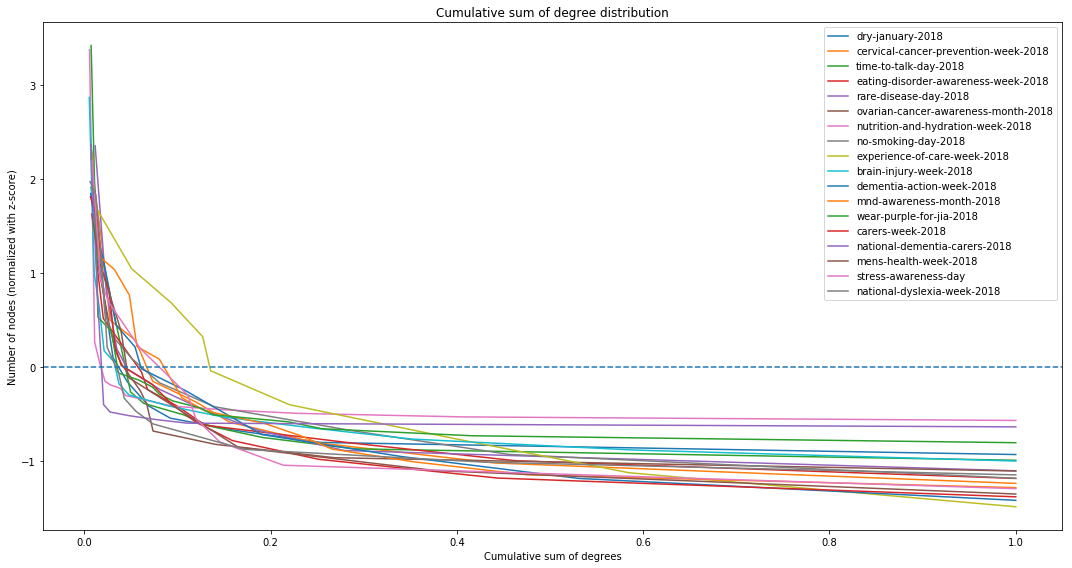

In [10]:
AnalysisHelper.plot_compare_cumsum_deg_dist(results);

Cumulative sum of degree distribution shows how the degree is distributed with respect to the number of nodes.

* Nodes with a lower degree (left on the plot) are typically way more than the ones with a high degree (right on the plot).

* Over the dotted line there's a number of node above the mean (the converse below the line) as per z-score.

* Z-score normalization for the number of nodes has been chosen because it preserves the range (maximum and minimum) and introduces the dispersion of the serie (standard deviation / variance)

\begin{align}
P(k) = \frac{\text{# nodes with degree >= k}}{\text{# nodes}}
\end{align}

Cumulative sum of degree distribution is more robust wrt the simple degree distribution because is less subject to small numbers. 

#### Summary stats for communities

In [11]:
AnalysisHelper.communities_summary_stats(results)

,values
degenerated_context_ratio,0.00
good_context_ratio,1.00
avg_communities_per_good_context,18.67
avg_sociable_users_ratio,0.61


Measures to detect the goodness of partitions from :
* *Degenerated context ratio*:
\begin{align}
\text{degenerated_context_ratio} = \frac{\text{# degenerated contexts}}{\text{# contexts}}
\end{align}
* *Good context ratio*: which is the reverse of the degenerated context ratio.
\begin{align}
\text{good_context_ratio} = \frac{\text{# good contexts}}{\text{# contexts}}
\end{align}
* *Average communities per context*: the average number of communities for number of contexts. Only considers good contexts.
\begin{align}
\text{avg_communities_per_good_context	} = \frac{\sum{\text{# good communities}}}{\text{# good contexts}}
\end{align}
* *Average sociable users ratio*: the average for the context number for the ratio of the users in the communities over the users found. Only considers good contexts.
\begin{align}
\text{avg_communities_per_good_context	} =
\frac{\sum{\frac{\text{# users in communities in context}}{\text{# all users in context}}}}
{\text{# good contexts}}
\end{align}

*note*: a "degenerated context" is a context for which the community detection algorithm hasn't found any community. Degenerated context provide then a unique great community which includes all the nodes of the network graph. A "good context" is the reverse: all the contexts for which the community detection algorithm has found at least a communtiy.

## Shared users analysis

#### Shared users and community detection

In [12]:
shared_nodes = AnalysisHelper.compare_common_nodes(results)
display(shared_nodes.is_present.value_counts())
display(shared_nodes)

False    69
True     33
Name: is_present, dtype: int64

,no_participations,is_present
nhsengland,4,True
carersuk,4,True
borntoosoonkh,3,False
jenniej95408140,3,True
cdcgov,3,False
timetochange,3,False
purehomecare,3,True
dementiauk,3,True
youngmindsuk,3,True
alzheimerssoc,3,True


Community detection process filters out users not belonging to any community.

In this table are listed all the users from all the contexts that belongs to more than one context. 

* *is_present* column: describes whether a user has survived the community detection process.
* *no_participations* column: counts how many contexts a user has been in.

**important**: no_participations below may differ for the fact that a user may have survived in a context but not other ones.

#### Shared users

In [13]:
shared_nodes = AnalysisHelper.get_common_nodes(results)
print(f'There are {len(shared_nodes.index)} shared nodes.')
display(shared_nodes.groupby('no_participations').count().name.to_frame().rename(columns={'name': 'count'}))
display(shared_nodes)

There are 33 shared nodes.


,count
no_participations,
2,29
3,2


,name,url,location,bio,follower_rank,no_participations
dementiauk,Dementia UK,http://www.dementiauk.org,"Aldgate, London",Dementia UK provides specialist dementia suppo...,0.980689,3
alzheimerssoc,Alzheimer's Society,http://www.alzheimers.org.uk/,"England, Wales & N.Ireland","We provide information and support, fund resea...",0.994459,3
feralwrangler,Trish Febrey,None,"Rochester, NY","Animal lover, believer in equal rights for all...",0.392125,2
wgmin_csc,None,None,None,None,0.000000,2
lancshospitals,Chorley&RoyalPreston,http://www.lancsteachinghospitals.nhs.uk/,Preston and Chorley,Lancashire Teaching Hospitals NHS Foundation T...,0.817918,2
nhsuk,NHS,http://www.nhs.uk/,England,Official site of the English NHS. \n\nMonitore...,0.977360,2
carriemaisie,Carrie,None,"South West, England","""It is madness for a sheep to talk peace with ...",0.300491,2
mentalhealth,Mental Health Fdn,http://www.mentalhealth.org.uk,UK,"The UK's charity for everyone's mental health,...",0.973755,2
arthritisruk,None,None,None,None,0.000000,2
youngmindsuk,YoungMinds,http://www.youngminds.org.uk,London,We're the UK’s leading charity,0.991692,2


Number of appearances of nodes across different events togheter with Tw infos.

#### Shared users and events

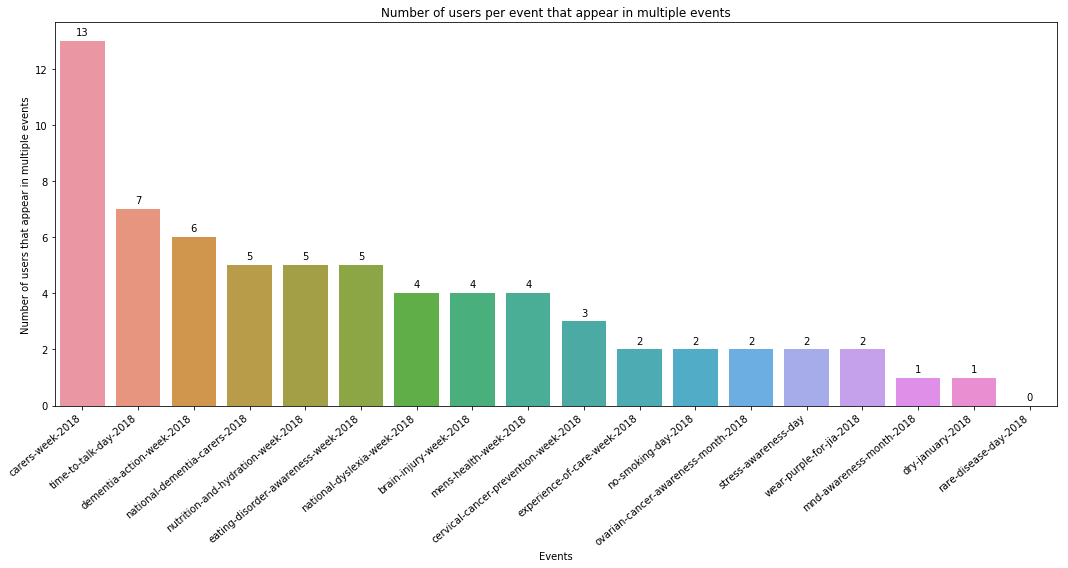

In [14]:
AnalysisHelper.plot_events_with_common_nodes(results, 'community_detection', 'nodes');

Number of users per event that appear in more than one event.

## Ranking

In [15]:
AnalysisHelper.rank1(results) #.groupby('count_1').count()

,community_id,count_1,sum_1
0,1,1,0.000000
1,2,1,0.000000
2,3,1,0.000000
3,4,1,0.000000
4,3,1,0.000000
5,3,1,0.000000
6,5,1,0.000000
7,6,1,0.000000
8,3,1,0.000000
9,4,1,0.000000
